In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

In [21]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

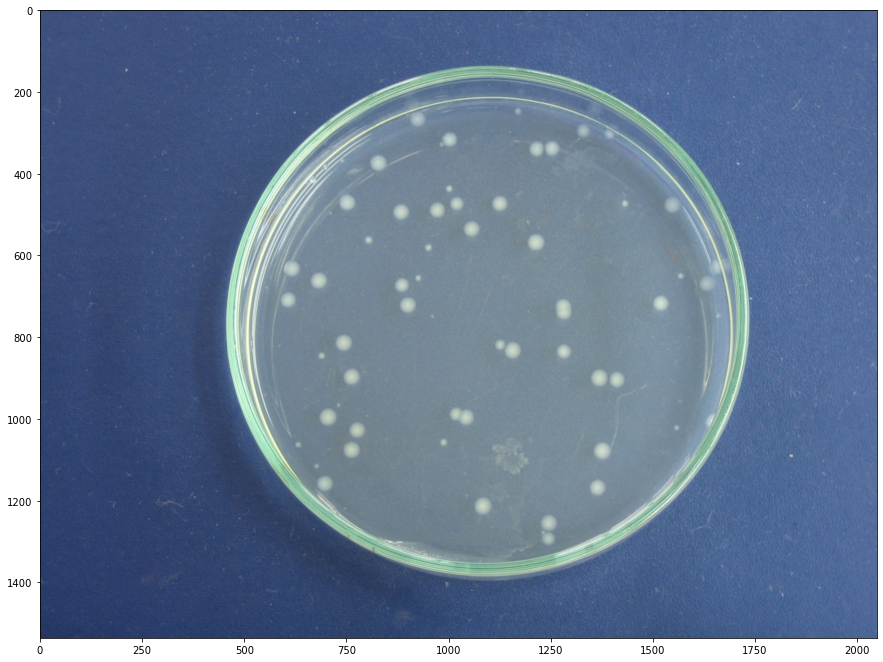

In [22]:
bakteri = cv2.imread("bacteria.jpg")
bakteri = cv2.cvtColor(bakteri, cv2.COLOR_BGR2RGB)
display(bakteri,cmap='gray')

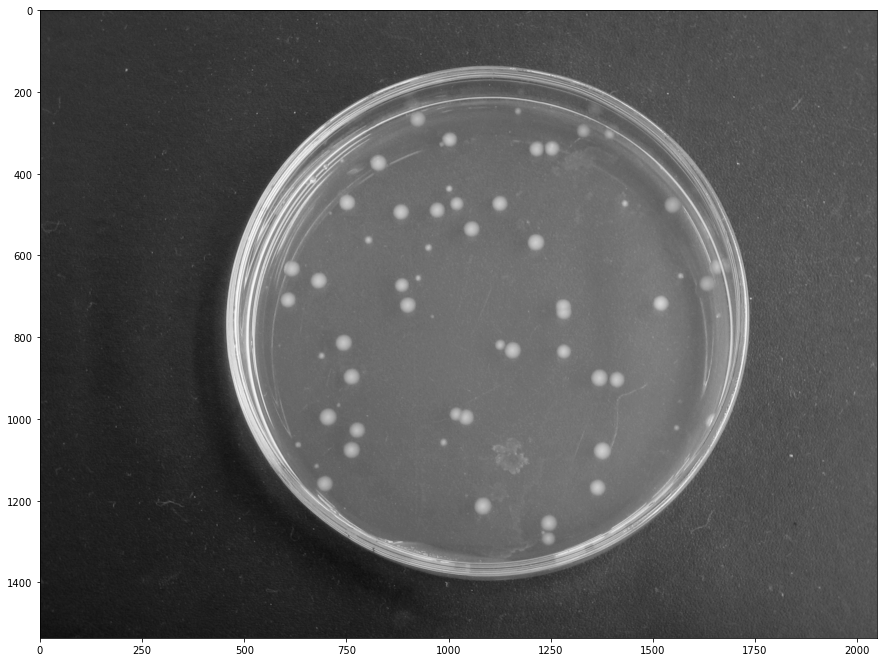

In [23]:
gray_bakteri = cv2.cvtColor(bakteri,cv2.COLOR_BGR2GRAY)
display(gray_bakteri,cmap='gray')

In [24]:
ret, thresh = cv2.threshold(gray_bakteri, 170, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [25]:
from skimage.segmentation import clear_border
opening = clear_border(opening) #Remove edge touching grains

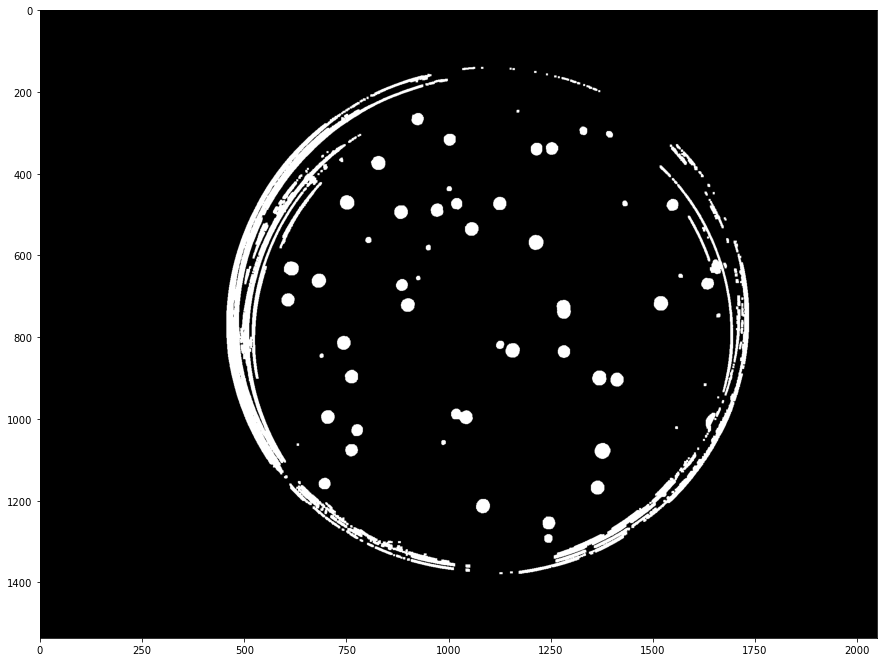

In [26]:
display(opening,cmap='gray')

In [27]:
sure_bg = cv2.dilate(opening,kernel,iterations=2)

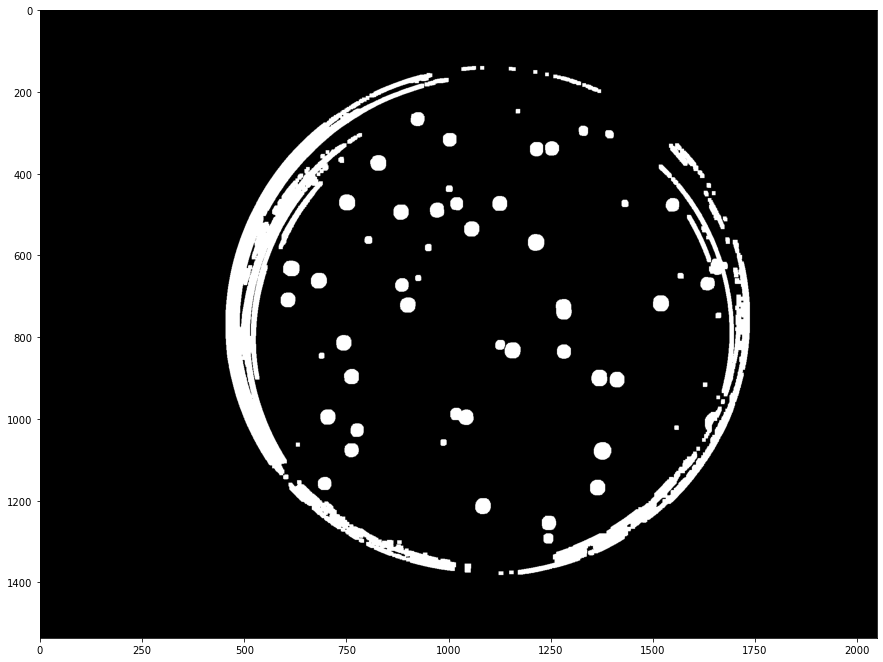

In [28]:
display(sure_bg,cmap='gray')

In [29]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)

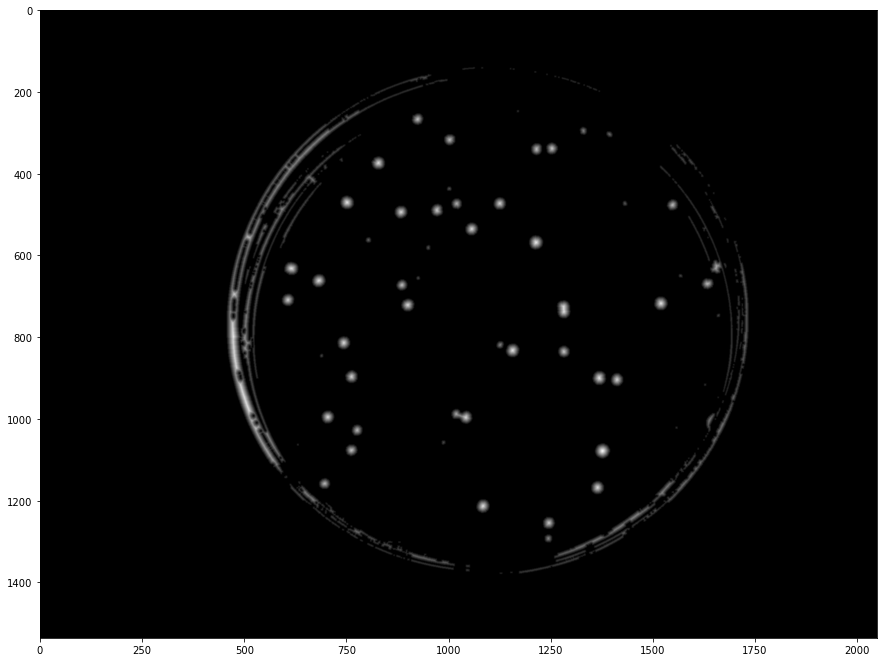

In [30]:
display(dist_transform, cmap='gray')

In [31]:
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_fg)

In [32]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+10

markers[unknown==255] = 0

markers = cv2.watershed(bakteri,markers)

bakteri[markers == -1] = [0,255,255]

In [33]:
bakteri = cv2.resize(bakteri, (1280, 1024))
#cv2.imshow('bakteri',bakteri)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

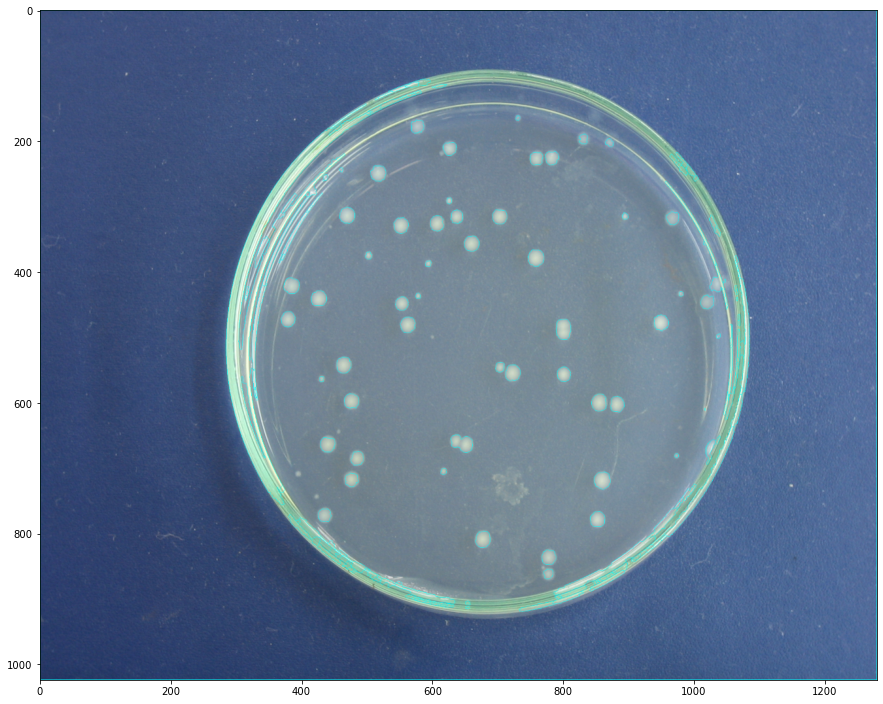

In [34]:
display(bakteri)